In [5]:
import numpy as np
import pandas as pd
import warnings

In [6]:
warnings.filterwarnings('ignore')

# Get the Dataset


In [7]:
columns_names=["user_id","item_id","ratiing","timestamp"]
df=pd.read_csv("movielense_100k/u.data",sep='\t', names=columns_names)

In [ ]:
#user id is the id of that person item id is the id of the movie and the rating is the rating given by that person

In [8]:
df.head()

,user_id,item_id,ratiing,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
df.shape

(100000, 4)

In [10]:
#check how many different user are here
df['user_id'].nunique()

943

In [11]:
df['item_id'].nunique()

1682

In [12]:
movies_titles=pd.read_csv("movielense_100k/u.item", sep="\|", header = None , encoding = "ISO-8859-1")

In [13]:
movies_titles.shape

(1682, 24)

In [14]:
movies_titles=movies_titles[[0,1]]

In [15]:
movies_titles.columns= ['item_id','title']

In [16]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
df=pd.merge(df,movies_titles, on="item_id")

In [18]:
df.tail()

,user_id,item_id,ratiing,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Exploratory Data Analysis


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('white')

In [20]:
df.groupby('title').mean()['ratiing'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: ratiing, dtype: float64

In [21]:
#how many people watch this movie 
df.groupby('title').count()['ratiing'].sort_values(ascending=False)
#means 9 user has watched the movie Til There Was You (1997)	

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: ratiing, Length: 1664, dtype: int64

In [ ]:
#star wars is the most ratted movie 

In [22]:
#lets create the data frame of the rating 
ratings=pd.DataFrame(df.groupby('title').mean()['ratiing'])

In [23]:
ratings.head()

,ratiing
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
ratings['number of ratings']=pd.DataFrame(df.groupby('title').count()['ratiing'])

In [25]:
ratings

,ratiing,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [26]:
ratings.sort_values(by='ratiing',ascending=False)

,ratiing,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


(array([520., 171., 122., 103.,  71.,  81.,  57.,  58.,  45.,  38.,  39.,
         25.,  26.,  22.,  25.,  28.,  14.,  16.,  14.,  15.,  24.,  15.,
          9.,   9.,   8.,   9.,  12.,   7.,   6.,   7.,   7.,   6.,   3.,
          5.,   3.,  11.,   2.,   3.,   2.,   2.,   1.,   3.,   0.,   1.,
          1.,   2.,   2.,   2.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   2.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([  1.        ,   9.31428571,  17.62857143,  25.94285714,
         34.25714286,  42.57142857,  50.88571429,  59.2       ,
         67.51428571,  75.82857143,  84.14285714,  92.45714286,
        100.77142857, 109.08571429, 117.4       , 125.71428571,
        134.02857143, 142.34285714, 150.65714286, 158.97142857,
        167.28571429, 175.6       , 183.91428571, 192.22857143,
        200.54285714, 208.85714286, 217.17142857, 225.48571429,
        233.8       , 242.11428571, 250.42857143, 258.74285714,
        26

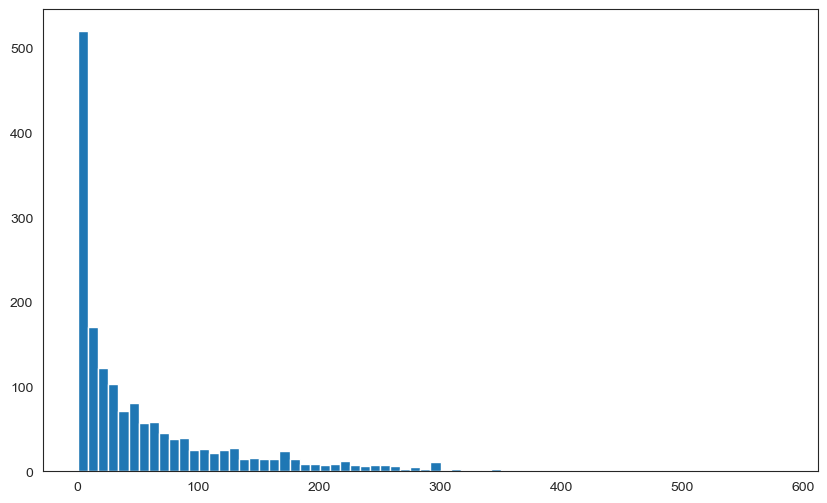

In [27]:
plt.figure(figsize=(10,6))
plt.hist(ratings['number of ratings'],bins = 70)

In [74]:
#x axis shows number of ratings and on y how many user have ratted this  movie

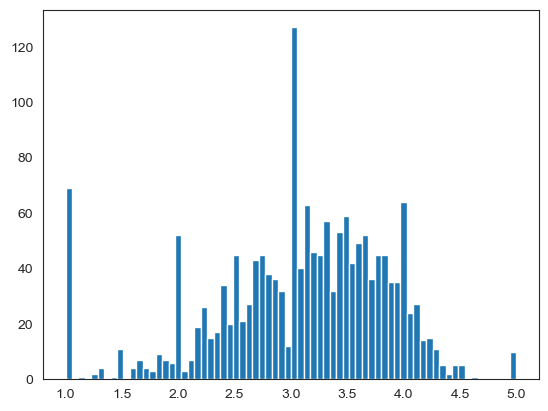

In [28]:
plt.hist(ratings['ratiing'],bins = 70)
plt.show()

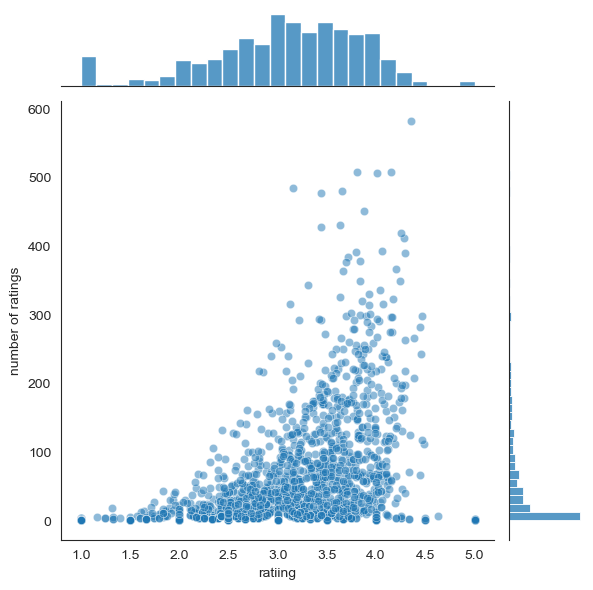

In [29]:
sns.jointplot(x='ratiing',y='number of ratings',data=ratings , alpha =0.5)

## Creating MOvie Recommendation


In [30]:
df.head()

,user_id,item_id,ratiing,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [31]:
moviemat=df.pivot_table(index="user_id",columns="title",values="ratiing")# this is a pandas function that is used to create a matrix that is use for the better visualization.

In [25]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [32]:
ratings.sort_values('number of ratings',ascending=False).head()

,ratiing,number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [33]:
starwars_user_ratings=moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [34]:
#now you can find the corelation of the Star Wars (1977)	 with other movies
similar_to_starwar=moviemat.corrwith(starwars_user_ratings)

In [35]:
corr_starwars=pd.DataFrame(similar_to_starwar,columns=['correlation'])

In [36]:
corr_starwars.dropna(inplace=True)

In [37]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [41]:
#so if you like starwars movie then i will suggest you the movie that is heighest correlated with the movie 

In [38]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [44]:
#we can not directly take these movie lets there only 6 user who ratted this movie 5 star but so it is the good corelation but we consider it only if the number of the user is greater than 100 

In [39]:
ratings


,ratiing,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [40]:
corr_starwars=corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [41]:
corr_starwars[corr_starwars['number of ratings']>100]

,correlation,number of ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
...,...,...
Willy Wonka and the Chocolate Factory (1971),0.221902,326
"Wizard of Oz, The (1939)",0.266335,246
"Wrong Trousers, The (1993)",0.216204,118


In [49]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('correlation',ascending=False)

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## Prediction Function


In [42]:
def prediction_movies(movie_name):
    movie_user_ratings =moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie =corr_movie.join(ratings['number of ratings'])
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('correlation',ascending=False)
    return predictions

In [53]:
predictions=prediction_movies('Ghost and the Darkness, The (1996)')

In [54]:
predictions.head()

,correlation,number of ratings
title,,
"Ghost and the Darkness, The (1996)",1.000000,128
Stargate (1994),0.726852,127
"Rainmaker, The (1997)",0.681187,145
Dragonheart (1996),0.629152,158
Interview with the Vampire (1994),0.617609,137


## THANK YOU